In [13]:
import networkx as nx
import numpy as np
import random
import os
import matplotlib.pyplot as plt
import time
from collections import Counter
%matplotlib inline 
from tqdm import tqdm

# parameters

alpha = 0.15
a = [1, 2, 4]

def read_folder() : # ok
    all_files = sorted(os.listdir(path = "C:/Users/Chun Lok/Downloads/as-caida"))
    # print(all_files)
    return all_files

def envolving_graph(file):    
    f = open(file)
    G = nx.Graph()

    n_lines = len(f.readlines())
    # print(n_lines)
    f = open(file)
    line = f.readline()
    # print(line)
    line = f.readline()
    # print(line)
    line = f.readline()
    # print(line)
    line = f.readline()
    # print(line)
    line = f.readline()
    # print(line)
    line = f.readline()
    # print(line)
    line = f.readline()
    # print(line)
    line = f.readline()
    # print(line)
    

    for i in range(8, n_lines) :
        line = f.readline()      
        line = line[:-1]
        line = line.split("\t")
        a = int(line[0])
        b = int(line[1])
        G.add_edge(a,b)

    f.close()
    return G

def current_graph(file) :
    f = open(file)
    r = nx.Graph()

    n_lines = len(f.readlines())
    # print(n_lines)
    f = open(file)
    line = f.readline()
    # print(line)
    line = f.readline()
    # print(line)
    line = f.readline()
    # print(line)
    line = f.readline()
    # print(line)
    line = f.readline()
    # print(line)
    line = f.readline()
    # print(line)
    line = f.readline()
    # print(line)
    line = f.readline()
    # print(line)

    for i in range(8, n_lines):
        line = f.readline()
        line = line[:-1]
        line = line.split("\t")
        a = int(line[0])
        b = int(line[1])
        r.add_edge(a, b)
        
    f.close()
    return r

def update_graph(graph, newnode) :
    G = graph
    E = list(G.edges())

    edge = random.choice(E)
    u = edge[0]
    v = edge[1]

    # change of head
    G.remove_edge(u,v)
    u = newnode
    G.add_edge(u, v)

    return G # new graph

def random_probing(current_graph) :
    picked_node = random.choice(list(current_graph.nodes()))
    return picked_node

def PowerIteration(graph) :
    V = list(graph.nodes())
    n = len(V)
    for i in range(len(V)):
        v = V[i]
        graph.nodes[v]["old_pi"] = 1/n
        graph.nodes[v]["new_pi"] = 1/n

    # power iterations
    iterations_count = 0
    while True:
        iterations_count += 1  # (pi(1)->pi(t))
        # iterate
        for i in range(len(V)):
            v = V[i]
            graph.nodes[v]["old_pi"] = graph.nodes[v]["new_pi"]
            graph.nodes[v]["new_pi"] = 0

        for i in range(len(V)):
            v = V[i]
            temp = 0
            for u in graph.neighbors(v):
                temp += graph.nodes[u]["old_pi"] / len(list(graph.neighbors(u)))
            graph.nodes[v]["new_pi"] = (1 - alpha) * temp + alpha / n

        # check convergence
        tol = 0
        for i in range(len(V)):
            v = V[i]
            tol += np.abs(graph.nodes[v]["old_pi"] - graph.nodes[v]["new_pi"])

        if tol < 1e-9:
            # print("convergence")
            break

    # set an attribute true pagerank pi to all nodes

    pagerank = {}
    for i in range(len(V)):
        v = V[i]
        pagerank[v] = graph.nodes[v]["new_pi"]
        graph.nodes[v]["real.pi"] = graph.nodes[v]["new_pi"]

    return pagerank

def L_error(true_pi, estimated_pi) :
    # L1 = sum of (estimated_pi - true_pi) at any time step t
    # Linfinity = max error of pagerank
    
    list = []
    for key in true_pi:
        if key not in list:
            list.append(key)

    for key in estimated_pi:
        if key not in list:
            list.append(key)
     
    check= len(set(list)) == len(list)
    
    if(check) : # whether all distinct node
        print("True")
    else :
        print("false")
        
    # print(true_pi[list[1]])
    # print(estimated_pi[list[1]])
    # print(list[1])
    # print(len(list))    
    result = np.zeros(len(list))

    # print(estimated_pi(list[1]))
    # print(len(list))
    
    count = 0
    for i in range(len(list)) :
        if((list[i] in estimated_pi) and (list[i] in true_pi )) :
            result[i] = abs((estimated_pi[list[i]])-(true_pi[list[i]]))          
        elif ((list[i] in estimated_pi) and (list[i] not in true_pi)) :
            result[i] = estimated_pi[list[i]]            
        else :
            result[i] = true_pi[list[i]] 
        count+=result[i]
        
    # print(count)
    # print(max(result))
    return count , max(result)


In [14]:
list_of_file = read_folder()

for i in range(len(list_of_file)) :
    list_of_file[i] = "C:/Users/Chun Lok/Downloads/as-caida/" + list_of_file[i]  
    
# print(len(list_of_file))

G = envolving_graph(list_of_file[0])
# print(len(list(G.edges())))

K = 1 # recomputing frequency 
changes = []
L1_metric = []
Linfinity_metric = []

for i in tqdm(range(1,len(list_of_file)),desc="Loading…", ascii=False, ncols=75) :
    g = current_graph(list_of_file[i])
    true_pi = PowerIteration(g) 
#______________________________________________________________________#
    for j in range(K) :
        node = random_probing(g)
        G = update_graph(G, node)        
    changes.append(K)
    K+=1
    estimated_pi = PowerIteration(G)
     
    L1_error, Linfinity_error = L_error(true_pi, estimated_pi)
    L1_metric.append(L1_error)
    Linfinity_metric.append(Linfinity_error)

    
print("Complete")


Loading…:   1%|▏                         | 1/121 [00:48<1:36:40, 48.34s/it]

True


Loading…:   2%|▍                         | 2/121 [01:36<1:35:36, 48.21s/it]

True


Loading…:   2%|▋                         | 3/121 [02:31<1:41:21, 51.54s/it]

True


Loading…:   3%|▊                         | 4/121 [03:26<1:42:47, 52.71s/it]

True


Loading…:   4%|█                         | 5/121 [04:18<1:41:45, 52.64s/it]

True


Loading…:   5%|█▎                        | 6/121 [05:11<1:40:46, 52.58s/it]

True


Loading…:   6%|█▌                        | 7/121 [06:12<1:45:20, 55.45s/it]

True


Loading…:   7%|█▋                        | 8/121 [07:09<1:45:09, 55.84s/it]

True


Loading…:   7%|█▉                        | 9/121 [08:07<1:45:22, 56.45s/it]

True


Loading…:   8%|██                       | 10/121 [09:04<1:44:50, 56.67s/it]

True


Loading…:   9%|██▎                      | 11/121 [10:03<1:45:19, 57.45s/it]

True


Loading…:  10%|██▍                      | 12/121 [11:04<1:46:04, 58.39s/it]

True


Loading…:  11%|██▋                      | 13/121 [12:02<1:45:18, 58.50s/it]

True


Loading…:  12%|██▉                      | 14/121 [13:04<1:46:00, 59.44s/it]

True


Loading…:  12%|███                      | 15/121 [14:03<1:44:56, 59.40s/it]

True


Loading…:  13%|███▎                     | 16/121 [15:03<1:44:01, 59.45s/it]

True


Loading…:  14%|███▌                     | 17/121 [16:07<1:45:24, 60.82s/it]

True


Loading…:  15%|███▋                     | 18/121 [17:07<1:43:56, 60.55s/it]

True


Loading…:  16%|███▉                     | 19/121 [18:08<1:43:09, 60.68s/it]

True


Loading…:  17%|████▏                    | 20/121 [19:14<1:45:00, 62.38s/it]

True


Loading…:  17%|████▎                    | 21/121 [20:22<1:46:39, 63.99s/it]

True


Loading…:  18%|████▌                    | 22/121 [21:25<1:45:07, 63.71s/it]

True


Loading…:  19%|████▊                    | 23/121 [22:31<1:45:09, 64.38s/it]

True


Loading…:  20%|████▉                    | 24/121 [23:39<1:45:48, 65.45s/it]

True


Loading…:  21%|█████▏                   | 25/121 [24:41<1:43:15, 64.54s/it]

True


Loading…:  21%|█████▎                   | 26/121 [25:47<1:42:44, 64.89s/it]

True


Loading…:  22%|█████▌                   | 27/121 [26:49<1:40:23, 64.08s/it]

True


Loading…:  23%|█████▊                   | 28/121 [27:56<1:40:27, 64.82s/it]

True


Loading…:  24%|█████▉                   | 29/121 [28:59<1:38:34, 64.29s/it]

True


Loading…:  25%|██████▏                  | 30/121 [30:06<1:38:40, 65.06s/it]

True


Loading…:  26%|██████▍                  | 31/121 [31:16<1:39:56, 66.63s/it]

True


Loading…:  26%|██████▌                  | 32/121 [32:23<1:38:52, 66.66s/it]

True


Loading…:  27%|██████▊                  | 33/121 [33:32<1:38:57, 67.47s/it]

True


Loading…:  28%|███████                  | 34/121 [34:37<1:36:50, 66.78s/it]

True


Loading…:  29%|███████▏                 | 35/121 [35:49<1:37:57, 68.35s/it]

True


Loading…:  30%|███████▍                 | 36/121 [37:00<1:37:54, 69.11s/it]

True


Loading…:  31%|███████▋                 | 37/121 [38:05<1:35:06, 67.94s/it]

True


Loading…:  31%|███████▊                 | 38/121 [39:13<1:33:54, 67.88s/it]

True


Loading…:  32%|████████                 | 39/121 [40:26<1:34:59, 69.51s/it]

True


Loading…:  33%|████████▎                | 40/121 [41:35<1:33:19, 69.13s/it]

True


Loading…:  34%|████████▍                | 41/121 [42:41<1:31:14, 68.43s/it]

True


Loading…:  35%|████████▋                | 42/121 [43:50<1:30:22, 68.64s/it]

True


Loading…:  36%|████████▉                | 43/121 [45:03<1:30:50, 69.88s/it]

True


Loading…:  36%|█████████                | 44/121 [46:11<1:28:48, 69.20s/it]

True


Loading…:  37%|█████████▎               | 45/121 [47:23<1:28:47, 70.09s/it]

True


Loading…:  38%|█████████▌               | 46/121 [48:36<1:28:34, 70.87s/it]

True


Loading…:  39%|█████████▋               | 47/121 [49:51<1:28:59, 72.15s/it]

True


Loading…:  40%|█████████▉               | 48/121 [51:02<1:27:33, 71.97s/it]

True


Loading…:  40%|██████████               | 49/121 [52:21<1:28:34, 73.82s/it]

True


Loading…:  41%|██████████▎              | 50/121 [53:37<1:28:08, 74.49s/it]

True


Loading…:  42%|██████████▌              | 51/121 [54:46<1:25:10, 73.01s/it]

True


Loading…:  43%|██████████▋              | 52/121 [55:57<1:23:13, 72.37s/it]

True


Loading…:  44%|██████████▉              | 53/121 [57:13<1:23:12, 73.42s/it]

True


Loading…:  45%|███████████▏             | 54/121 [58:33<1:24:03, 75.28s/it]

True


Loading…:  45%|███████████▎             | 55/121 [59:44<1:21:29, 74.09s/it]

True


Loading…:  46%|██████████▋            | 56/121 [1:01:00<1:21:04, 74.84s/it]

True


Loading…:  47%|██████████▊            | 57/121 [1:02:14<1:19:27, 74.49s/it]

True


Loading…:  48%|███████████            | 58/121 [1:03:28<1:18:02, 74.33s/it]

True


Loading…:  49%|███████████▏           | 59/121 [1:04:40<1:16:09, 73.70s/it]

True


Loading…:  50%|███████████▍           | 60/121 [1:06:00<1:16:40, 75.41s/it]

True


Loading…:  50%|███████████▌           | 61/121 [1:07:19<1:16:30, 76.51s/it]

True


Loading…:  51%|███████████▊           | 62/121 [1:08:30<1:13:35, 74.83s/it]

True


Loading…:  52%|███████████▉           | 63/121 [1:09:46<1:12:51, 75.37s/it]

True


Loading…:  53%|████████████▏          | 64/121 [1:11:02<1:11:39, 75.43s/it]

True


Loading…:  54%|████████████▎          | 65/121 [1:12:18<1:10:38, 75.69s/it]

True


Loading…:  55%|████████████▌          | 66/121 [1:13:38<1:10:26, 76.84s/it]

True


Loading…:  55%|████████████▋          | 67/121 [1:14:56<1:09:29, 77.22s/it]

True


Loading…:  56%|████████████▉          | 68/121 [1:16:08<1:06:54, 75.74s/it]

True


Loading…:  57%|█████████████          | 69/121 [1:17:16<1:03:33, 73.34s/it]

True


Loading…:  58%|█████████████▎         | 70/121 [1:18:35<1:03:54, 75.19s/it]

True


Loading…:  59%|█████████████▍         | 71/121 [1:19:53<1:03:16, 75.93s/it]

True


Loading…:  60%|█████████████▋         | 72/121 [1:21:09<1:02:01, 75.95s/it]

True


Loading…:  60%|█████████████▉         | 73/121 [1:22:31<1:02:11, 77.74s/it]

True


Loading…:  61%|██████████████         | 74/121 [1:23:48<1:00:51, 77.69s/it]

True


Loading…:  62%|███████████████▍         | 75/121 [1:25:05<59:13, 77.26s/it]

True


Loading…:  63%|███████████████▋         | 76/121 [1:26:21<57:44, 76.98s/it]

True


Loading…:  64%|███████████████▉         | 77/121 [1:27:39<56:35, 77.17s/it]

True


Loading…:  64%|████████████████         | 78/121 [1:28:56<55:16, 77.14s/it]

True


Loading…:  65%|████████████████▎        | 79/121 [1:30:14<54:17, 77.56s/it]

True


Loading…:  66%|████████████████▌        | 80/121 [1:31:27<51:58, 76.06s/it]

True


Loading…:  67%|████████████████▋        | 81/121 [1:32:44<50:59, 76.48s/it]

True


Loading…:  68%|████████████████▉        | 82/121 [1:34:04<50:24, 77.55s/it]

True


Loading…:  69%|█████████████████▏       | 83/121 [1:35:22<49:10, 77.66s/it]

True


Loading…:  69%|█████████████████▎       | 84/121 [1:36:47<49:17, 79.93s/it]

True


Loading…:  70%|█████████████████▌       | 85/121 [1:38:05<47:31, 79.20s/it]

True


Loading…:  71%|█████████████████▊       | 86/121 [1:39:30<47:12, 80.94s/it]

True


Loading…:  72%|█████████████████▉       | 87/121 [1:40:54<46:18, 81.73s/it]

True


Loading…:  73%|██████████████████▏      | 88/121 [1:42:14<44:48, 81.48s/it]

True


Loading…:  74%|██████████████████▍      | 89/121 [1:43:36<43:32, 81.64s/it]

True


Loading…:  74%|██████████████████▌      | 90/121 [1:44:56<41:50, 80.98s/it]

True


Loading…:  75%|██████████████████▊      | 91/121 [1:46:18<40:35, 81.19s/it]

True


Loading…:  76%|███████████████████      | 92/121 [1:47:43<39:49, 82.40s/it]

True


Loading…:  77%|███████████████████▏     | 93/121 [1:49:11<39:19, 84.28s/it]

True


Loading…:  78%|███████████████████▍     | 94/121 [1:50:44<38:59, 86.67s/it]

True


Loading…:  79%|███████████████████▋     | 95/121 [1:52:06<37:01, 85.46s/it]

True


Loading…:  79%|███████████████████▊     | 96/121 [1:53:27<34:59, 83.96s/it]

True


Loading…:  80%|████████████████████     | 97/121 [1:54:58<34:24, 86.01s/it]

True


Loading…:  81%|████████████████████▏    | 98/121 [1:56:26<33:14, 86.74s/it]

True


Loading…:  82%|████████████████████▍    | 99/121 [1:57:55<32:02, 87.40s/it]

True


Loading…:  83%|███████████████████▊    | 100/121 [1:59:29<31:16, 89.34s/it]

True


Loading…:  83%|████████████████████    | 101/121 [2:00:58<29:42, 89.14s/it]

True


Loading…:  84%|████████████████████▏   | 102/121 [2:02:34<28:53, 91.26s/it]

True


Loading…:  85%|████████████████████▍   | 103/121 [2:04:08<27:38, 92.15s/it]

True


Loading…:  86%|████████████████████▋   | 104/121 [2:05:46<26:38, 94.04s/it]

True


Loading…:  87%|████████████████████▊   | 105/121 [2:07:19<24:56, 93.51s/it]

True


Loading…:  88%|█████████████████████   | 106/121 [2:08:49<23:09, 92.61s/it]

True


Loading…:  88%|█████████████████████▏  | 107/121 [2:10:18<21:19, 91.38s/it]

True


Loading…:  89%|█████████████████████▍  | 108/121 [2:11:50<19:51, 91.66s/it]

True


Loading…:  90%|█████████████████████▌  | 109/121 [2:13:30<18:49, 94.09s/it]

True


Loading…:  91%|█████████████████████▊  | 110/121 [2:15:04<17:14, 94.05s/it]

True


Loading…:  92%|██████████████████████  | 111/121 [2:16:30<15:18, 91.80s/it]

True


Loading…:  93%|██████████████████████▏ | 112/121 [2:18:00<13:39, 91.05s/it]

True


Loading…:  93%|██████████████████████▍ | 113/121 [2:18:45<10:19, 77.43s/it]

True


Loading…:  94%|██████████████████████▌ | 114/121 [2:20:11<09:20, 80.05s/it]

True


Loading…:  95%|██████████████████████▊ | 115/121 [2:21:38<08:12, 82.03s/it]

True


Loading…:  96%|███████████████████████ | 116/121 [2:23:09<07:03, 84.62s/it]

True


Loading…:  97%|███████████████████████▏| 117/121 [2:24:41<05:47, 86.85s/it]

True


Loading…:  98%|███████████████████████▍| 118/121 [2:26:10<04:22, 87.43s/it]

True


Loading…:  98%|███████████████████████▌| 119/121 [2:27:39<02:55, 87.91s/it]

True


Loading…:  99%|███████████████████████▊| 120/121 [2:29:10<01:29, 89.03s/it]

True


Loading…: 100%|████████████████████████| 121/121 [2:30:40<00:00, 74.72s/it]

True
Complete


In [17]:
#checking
# print(L1_error)
print(len(L1_metric)) 
print(len(Linfinity_metric))


121
121


# Plot error graph

In [24]:
def L1_error_graph(L1_metric) :
    ch = [1]
    for i in range(2,122):
        ch.append(ch[i-2]+i)
         
    # print(ch)
    plt.plot(ch ,L1_metric)
    plt.ylabel('averageL1_error')
    plt.xlabel('# changes')
    plt.show()
    

def Linfinity_error_graph(Linfinity_metric) :
    ch = [1]
    for i in range(2,122):
        ch.append(ch[i-2]+i)
        
    plt.plot(ch,Linfinity_metric)
    plt.ylabel('averageLinfinity_error')
    plt.xlabel('# changes')
    plt.title
    plt.show()

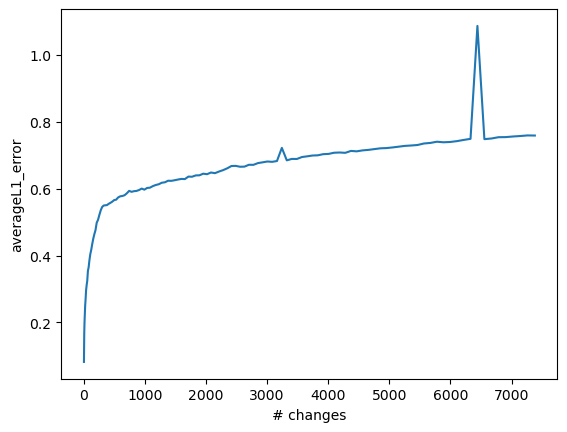

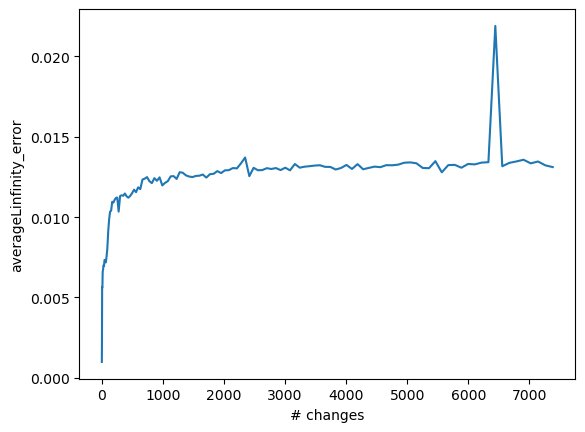

In [25]:
L1_error_graph(L1_metric)
Linfinity_error_graph(Linfinity_metric)